In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
df.shape

(768, 9)

In [45]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [47]:
X = df.drop(['Outcome'],axis='columns')
y = df.Outcome

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
X_scaled = scaler.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3)

In [51]:
X_train.shape

(537, 8)

In [52]:
X_test.shape

(231, 8)

In [53]:
y_train.shape

(537,)

In [54]:
y_test.shape

(231,)

In [59]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
selected_columns = df[column_names]

# Using Logistic Classification

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [35]:
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
model.score(X_test,y_test)

0.7359307359307359

In [77]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

# confusion matrix

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[121,  16],
       [ 36,  58]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

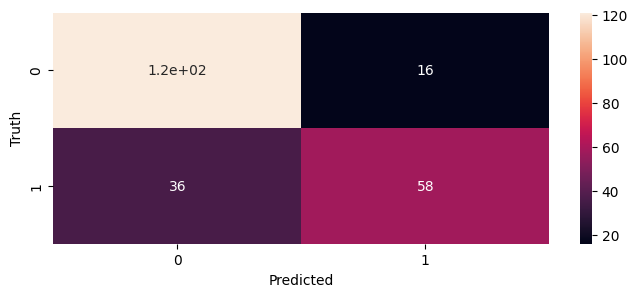

In [83]:
import seaborn as sn
plt.figure(figsize=(8,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# visualizing the dataset with lineplot

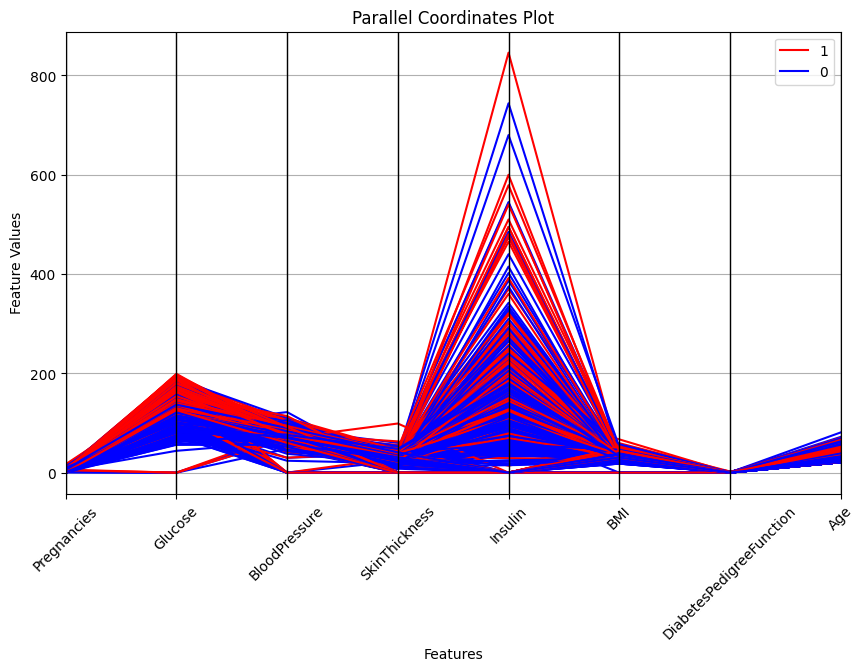

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load your dataset (replace 'dataset.csv' with your actual file)
df = pd.read_csv('diabetes.csv')

# Assuming 'output_column' is the name of your output column
output_column = 'Outcome'

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df, output_column, color=('red', 'blue'))  # You can customize colors
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


# using Support Vector machine classifier

In [100]:
from sklearn.svm import SVC
model_1 = SVC(kernel='linear')

In [101]:
model_1.fit(X_train,y_train)

SVC(kernel='linear')

In [102]:
model.score(X_test,y_test)

0.7748917748917749

# using random forest classification

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

In [74]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [75]:
model.score(X_test,y_test)

0.7748917748917749

# predictive model

In [103]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model_1.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
The person is not diabetic
